### Note book four

Plastics and fragemented plastics

__Research questions:__

1. _How do the values found on the day of the survey compare to previous values?_
2. _What is the distribution of fragmented plastics?_
3. _Does the quantity of plastics found (all plastic objects) change in relation to the total found?

#### Contents

1. Putting the variaibles in place => _complete_
2. Abundance: comparing surveys by top-ten => _complete_
3. Density: comparing surveys  by pieces per meter => _complete_
4. Probability: Exploring some continuous distributions => complete

#### Remarks

1. Most of the methods have been moved to the utilities folder
2. helper functions are in the workbook
3. It is best if you develop your own notebooks and add them to the repo. Use this as an example. 

contributors: @hammerdirt, @terborch

In [1]:
import numpy as np
import datetime
from scipy import stats
from collections import OrderedDict
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates
from matplotlib import colors as mcolors
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import Utilities.MlwCode as mlw_code
import Utilities.utilities as my_utilities
import Utilities.SeasonalBoxPlots as seasonalBoxPlots
import Utilities.MonthlyResultsBoxPlots as monthlyResults
import matplotlib.gridspec as gridspec

### Assigning variables and getting data:

Using the methods from the previous notebooks, choose the codes of interest and assign colors and parameters to variables.

In [2]:
# Variables to constrict the MLW code data into classes
the_codes = pd.read_csv("Data/mlw_code_defs.csv")
my_plastics = the_codes.loc[the_codes.material == 'Plastic']
the_codes_of_interest = list(my_plastics['code'])
# codes_of_interest =["G32","G67","G82","G79"]
# Day and location of interest:
date_of_interest = "2019-10-24"
# this needs to be exactly the way it is stored, check the webiste for correct spelling
place_of_interest = "Rolle-plage"
# the lake or body of water you are comparing to:
region_of_interest = "Lake Geneva"
# used as place holders in the function, one for each code:
# variable_names=["beach_info", "get_toys", "get_sheeting", "get_plastics"]
# Give a common name to the MLW codes these appear in the charts:
# names=["Toys", "Plastic-sheeting", "Polystyrene", "Broken plastics"]
# A color for each code, use named matplotlib codes:
# colors = ["darkmagenta", "darkslategray", "darkorange", "teal"]
# the api end point:
end_point = "http://mwshovel.pythonanywhere.com/dirt/codes/Lac-L%C3%A9man/"
# group the months into seasons:
seasons = {"winter":[12,1,2],"spring":[3,4,5],"summer":[6,7,8],"fall":[9,10,11]}
# the colors for each season of the year:
seasons_colors = {"winter":"cyan","spring":"lime","summer":"saddlebrown","fall":"darkgoldenrod",}
# Link months integer value to string abbreviation:
months = {
    1:"Jan",
    2:"Feb",
    3:"Mar",
    4:"Apr",
    5:"May",
    6:"Jun",
    7:"Jul",
    8:"Aug",
    9:"Sep",
    10:"Oct",
    11:"Nov",
    12:"Dec",
}
regional_data = requests.get(end_point).json()
regional_data_df = pd.DataFrame(regional_data)
plastic_data_df = regional_data_df[regional_data_df.code_id.isin(the_codes_of_interest)].copy()

date_min = regional_data_df.date.min()
date_max = regional_data_df.date.max()
date_string = "Lake Geneva {} - {}".format(date_min, date_max)
# making the file structure
# if you changed the file structure then this function will be problematic
folders = ["Data", "Charts", "Utilities"]
here = os.getcwd()

### Occurence of objects:

#### The twenty most frequently identified plastic objects on Lake Geneva

In [3]:
cat_occurences = plastic_data_df['code_id'].value_counts()
top_twenty = cat_occurences[:20]
the_codes = plastic_data_df.code_id.unique()
number_of_codes = len(the_codes)
a_string = "There were {} different plastic categories identified between {} and {}".format(number_of_codes, date_min, date_max)
print(a_string)

There were 68 different plastic categories identified between 2015-11-23 and 2019-10-24


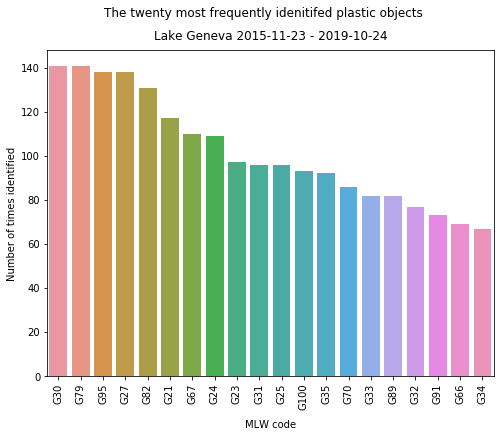

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
ax= sns.barplot(x = top_twenty.index, y = top_twenty)
plt.suptitle("The twenty most frequently idenitifed plastic objects")
plt.title(date_string, pad=10)
plt.ylabel('Number of times identified')
plt.xlabel('MLW code', labelpad=10)
plt.xticks(rotation=90)
plt.show()

### Plastic objects by quantity

#### The twenty most common plastic objects by quantity

In [5]:
code_totals = plastic_data_df[['code_id','quantity']].groupby('code_id').sum()
code_totals.reset_index(inplace=True)
my_twenty = code_totals.sort_values('quantity', axis=0, ascending=False, inplace=False, kind='quicksort').copy()

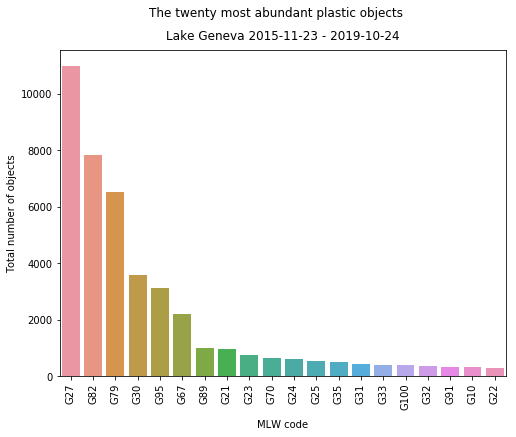

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
ax= sns.barplot(x = 'code_id', y = 'quantity', data=my_twenty[:20])
plt.suptitle("The twenty most abundant plastic objects")
plt.title(date_string, pad=10)
plt.ylabel('Total number of objects')
plt.xlabel('MLW code', labelpad=10)
plt.xticks(rotation=90)
plt.show()

### Pieces of plastic objects per meter

The portion of the pieces of trash per meter value could be attibuted to plastic

In [7]:
regional_data_df['pcs_m'] = regional_data_df['quantity']/regional_data_df['length']
plastic_data_df['pcs_m'] = plastic_data_df['quantity']/plastic_data_df['length']
all_trash = regional_data_df[['date', 'pcs_m']]
just_plastic = plastic_data_df[['date', 'pcs_m']]

### How do your results compare ?